In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
import statsmodels.api as sm

from sklearn.metrics import precision_recall_curve

from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import IncrementalPCA

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


### read data

In [2]:

df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

### create backup of data

In [4]:
original = df.copy()

In [5]:
df.tail()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,329.136,0.00,7.36,10.93,0.00,488.46,381.64,14.96,0.0,0.0,0.00,0.0,0.0,0.00,2.44,7.19,0.00,60.64,89.66,0.00,0.00,0.00,0.0,2.43,0.86,0.00,63.09,96.86,0.00,4.91,3.73,0.00,414.61,290.14,0.0,0.0,0.0,0.0,0.0,0.0,0.00,419.53,293.88,0.00,0.0,0.0,0.00,14.05,1.83,0.0,0.0,0.0,0.00,496.68,392.58,0.00,26.59,33.84,0.00,172.33,223.91,0.00,1.06,0.00,0.00,199.99,257.76,0.00,0.00,0.00,0.00,21.99,11.79,0.0,0.0,0.00,0.0,0.0,0.0,0.00,21.99,11.79,0.00,221.99,269.56,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1,17,13,50,397,512,50,110,130,6/18/2014,7/31/2014,8/31/2014,50,20,130,NaN,7/31/2014,8/21/2014,NaN,7.0,1.0,NaN,25.0,17.0,NaN,6.0,1.0,NaN,1.0,0.0,NaN,135.0,17.0,0.00,244.59,144.31,0.00,0.00,0.00,NaN,21.91,0.00,NaN,60.61,48.00,NaN,0.0,0.0,0,0,0,0,6,1,0,0,0,0,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,265.772,116.54,196.46,232.63,49.53,96.28,48.06,0.00,0.0,0.0,0.00,0.0,0.0,7.18,30.11,9.06,37.53,73.84,47.34,2.01,0.00,0.00,0.0,4.01,0.00,46.73,103.96,56.41,109.36,166.34,223.56,9.98,18.41,0.53,0.0,0.0,0.0,0.0,0.0,0.0,119.34,184.76,224.09,0.00,0.0,0.0,0.13,4.01,0.18,0.0,0.0,0.0,166.21,292.74,280.69,30.48,28.48,23.09,21.78,35.18,28.79,2.38,0.21,0.00,54.64,63.88,51.89,16.63,39.23,66.28,8.96,9.31,17.24,0.0,0.0,0.00,0.0,0.0,0.0,25.59,48.54,83.53,80.24,112.43,136.01,0.0,0.0,0.5,0.00,0.0,0.00,0.00,0.00,0.08,5,11,9,200,31

In [6]:
df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

### describing the data

In [7]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


## null check

In [9]:
df.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou

In [10]:
df.isna().sum()/df.isna().count()*100

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

## shape

In [11]:

df.shape

(69999, 172)

## duplicates

In [12]:
df.drop_duplicates(subset=None, inplace=True)
df.shape

(69999, 172)

In [13]:
df.size

12039828

In [14]:
df.axes

[RangeIndex(start=0, stop=69999, step=1),
 Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
        'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
        'arpu_6', 'arpu_7',
        ...
        'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
        'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
       dtype='object', length=172)]

### dimensions

In [15]:
df.ndim

2

In [16]:
### columns

In [17]:
df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

###### deleting some recharge columns

In [18]:
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', ]

df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


In [20]:
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head()

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN


###### for reacharge columns with na values we can imput the NAs to 0

In [21]:
rech_NA = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']

In [23]:
df[rech_NA] = df[rech_NA].apply(lambda x: x.fillna(0))


##### featuring

In [24]:
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',             
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'             
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'             
            ]

### dropping id and date

In [27]:
df = df.drop(id_cols + date_cols, axis=1)

In [28]:
df.shape

(69999, 161)

### null handling for cat columns fill with -1

In [29]:
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

### Also number of cols have missing values more that 70% lets drop them

In [31]:
initial_cols = df.shape[1]

include_cols = df.columns[df.isnull().mean() < 0.7]

drop_missing = pd.DataFrame({'features': df.columns, 'include': df.columns.isin(include_cols)})

drop_missing[drop_missing.include]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,onnet_mou_6,True
7,onnet_mou_7,True
8,onnet_mou_8,True
9,offnet_mou_6,True


In [32]:
df = df.loc[:, include_cols]

dropped_cols = df.shape[1] - initial_cols
dropped_cols

-12

In [33]:
df.shape

(69999, 149)

In [34]:
num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

### num_cols NA imputing with median

In [36]:
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

In [38]:
df.isnull().sum()*100/df.shape[0]

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_m

## High value customers

### recharge amt or -- June and July

In [42]:
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

### talk + data

In [44]:
df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7

In [46]:
# avg done by these 2 months
df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2

In [47]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1958,0.0,0.0,0.0,0,0.0,0.0,77.0,65.0,71.0
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,-1.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,-1.0,1.0,-1.0,710,0.0,0.0,0.0,0,0.0,145.0,0.0,290.0,145.0
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31

##### now that we have the amt data we can retain the customers with amt more than 70 percentile

In [49]:
df_filtered = df.loc[df.av_amt_data_6_7 >= df.av_amt_data_6_7.quantile(0.7), :]
df_filtered = df_filtered.reset_index(drop=True)

In [50]:
df_filtered.shape

(21013, 154)

In [51]:
df_filtered = df_filtered.drop(['total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)

In [52]:
df_filtered.shape

(21013, 149)

In [53]:
###### churn cols

In [54]:
df_col=['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']
df_filtered[df_col].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_8  21013 non-null  float64
 1   total_og_mou_8  21013 non-null  float64
 2   vol_2g_mb_8     21013 non-null  float64
 3   vol_3g_mb_8     21013 non-null  float64
dtypes: float64(4)
memory usage: 656.8 KB


### churn/non churn percentage


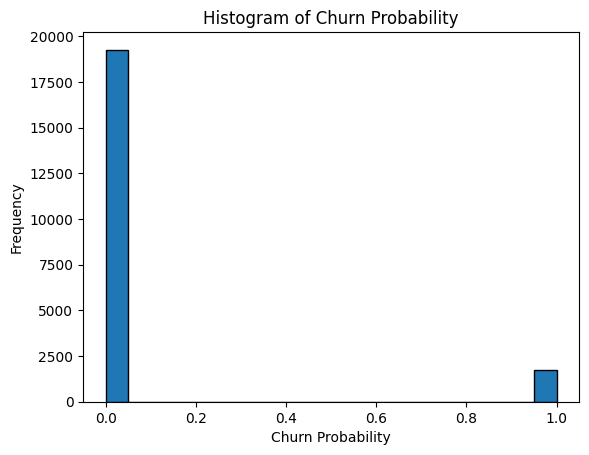

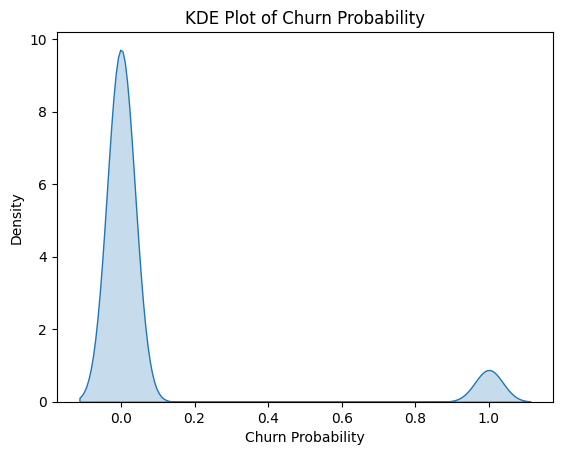

In [58]:
# Plot histogram
plt.hist(df_filtered['churn_probability'], bins=20, edgecolor='black')
plt.xlabel('Churn Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Churn Probability')
plt.show()

# Plot KDE
sns.kdeplot(df_filtered['churn_probability'], shade=True)
plt.xlabel('Churn Probability')
plt.ylabel('Density')
plt.title('KDE Plot of Churn Probability')
plt.show()

##### good percentage of customers do not churn, still some columns can be dropped

 Moreover, we can enhance data quality by removing additional columns linked to the "good phase" that we previously identified. These columns should be excluded during the data preprocessing phase.

In [61]:
df_filtered.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

We can create new columns to represent the variables associated with the "good phase" and remove the individual 6th and 7th-month variables.

Before addressing the remaining missing values, let's evaluate the collinearity among the independent variables to understand their interdependencies.

In [69]:
# separating by month
mon_6_cols = [col for col in df_filtered.columns if '_6' in col]
mon_7_cols = [col for col in df_filtered.columns if '_7' in col]
mon_8_cols = [col for col in df_filtered.columns if '_8' in col]

In [71]:
df_corr = df_filtered.corr()
df_corr.loc[:,:] = np.tril(df_corr, k=-1)
df_corr = df_corr.stack()
df_corr
df_corr[(df_corr > 0.80) | (df_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8               0.958953
fb_user_6           night_pck_user_6     0.957744
isd_og_mou_8        isd_og_mou_7         0.956635
fb_user_7           night_pck_user_7     0.955499
fb_user_8           night_pck_user_8     0.954382
isd_og_mou_7        isd_og_mou_6         0.936012
isd_og_mou_8        isd_og_mou_6         0.934200
total_ic_mou_6      loc_ic_mou_6         0.901348
total_ic_mou_8      loc_ic_mou_8         0.898511
sachet_2g_8         total_rech_data_8    0.897476
total_ic_mou_7      loc_ic_mou_7         0.883143
std_og_t2t_mou_7    onnet_mou_7          0.861786
std_og_t2t_mou_6    onnet_mou_6          0.860921
std_og_t2t_mou_8    onnet_mou_8          0.858635
std_og_t2m_mou_7    offnet_mou_7         0.857958
std_og_t2m_mou_8    offnet_mou_8         0.855066
total_og_mou_8      std_og_mou_8         0.850737
total_og_mou_7      std_og_mou_7         0.850341
loc_ic_mou_6        loc_ic_t2m_mou_6     0.846101
loc_og_mou_8        loc_og_mou_7         0.842607


higher ones we remove

In [73]:
col_to_drop=['fb_user_6','fb_user_7','total_ic_mou_6','total_ic_mou_7',               
               'std_og_t2t_mou_7','std_og_t2t_mou_6' ,'std_og_t2m_mou_7','std_ic_mou_7',]

df_filtered.drop(col_to_drop, axis=1, inplace=True)

In [74]:
df_filtered.shape

(21013, 135)

## Data Preparation

### new columns

aon >> tenure

In [80]:
df_filtered['tenure'] = (df_filtered['aon']/30).round(0)

df_filtered.drop('aon',axis=1, inplace=True)

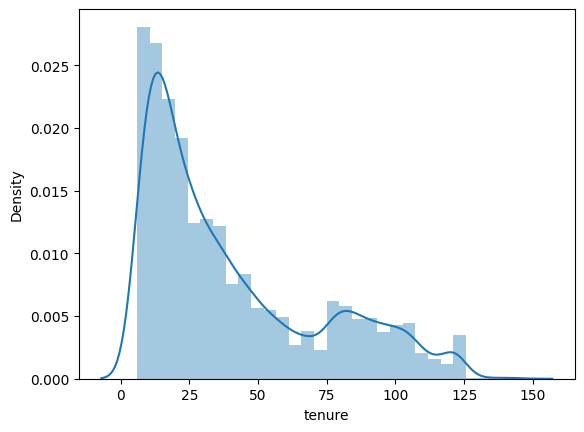

In [83]:
sns.distplot(df_filtered['tenure'], bins=30)
plt.show()

In [84]:
tenure_range = [0, 6, 12, 24, 60, 61]
tenure_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df_filtered['tenure_range'] = pd.cut(df_filtered['tenure'], tenure_range, labels=tenure_label)
df_filtered['tenure_range'].head()

0    1-2 Yrs
1    1-2 Yrs
2    1-2 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

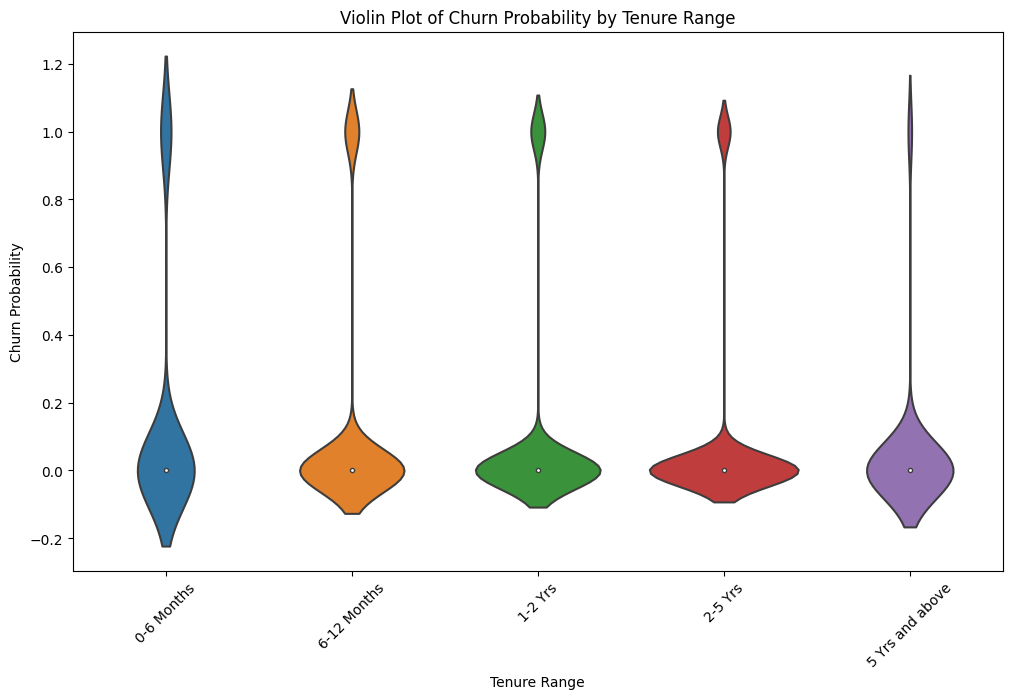

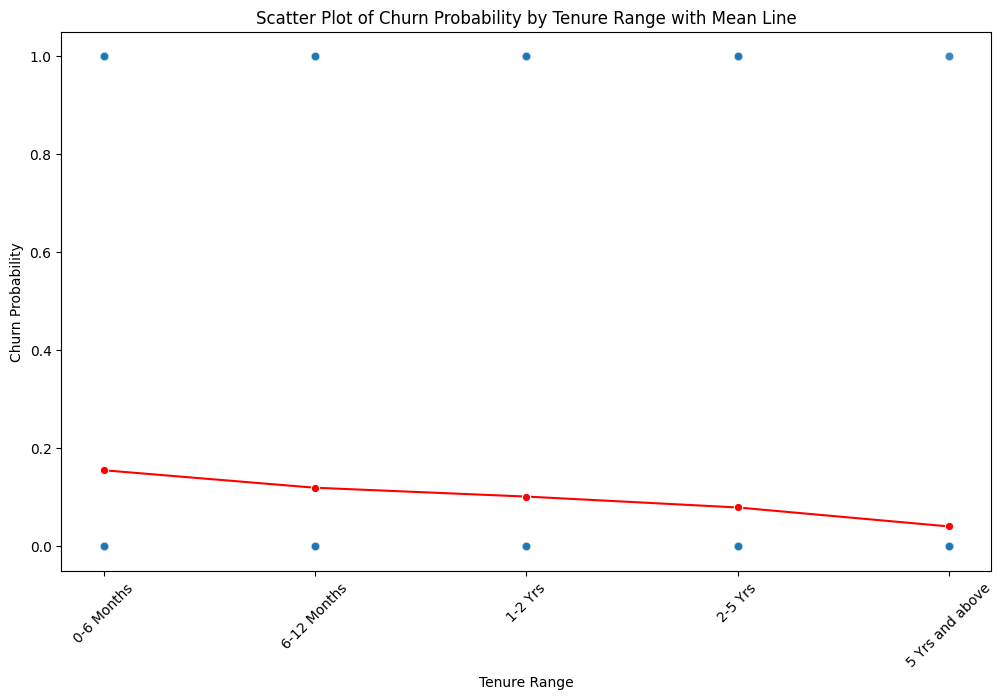

In [88]:
plt.figure(figsize=[12,7])
sns.violinplot(x='tenure_range', y='churn_probability', data=df_filtered)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Tenure Range')
plt.ylabel('Churn Probability')
plt.title('Violin Plot of Churn Probability by Tenure Range')
plt.show()


mean_churn_probability = df_filtered.groupby('tenure_range')['churn_probability'].mean().reset_index()

plt.figure(figsize=[12,7])
sns.scatterplot(x='tenure_range', y='churn_probability', data=df_filtered, alpha=0.5)
sns.lineplot(x='tenure_range', y='churn_probability', data=mean_churn_probability, color='red', marker='o')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Tenure Range')
plt.ylabel('Churn Probability')
plt.title('Scatter Plot of Churn Probability by Tenure Range with Mean Line')
plt.show()

0 - 6 months is when the max churn happens whereas older ones tend to churn less

In [91]:
df_filtered["avg_arpu_6_7"]= (df_filtered['arpu_6'] + df_filtered['arpu_7'])/2
df_filtered['avg_arpu_6_7'].head()

0     184.4495
1     478.9215
2    1018.2270
3     362.0215
4     370.7370
Name: avg_arpu_6_7, dtype: float64

In [92]:
# removing original as we have new columns
df_filtered.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

In [93]:
df_filtered.shape

(21013, 135)

<Figure size 1200x700 with 0 Axes>

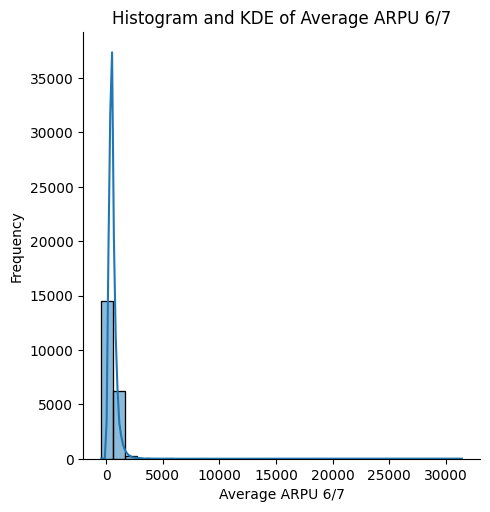

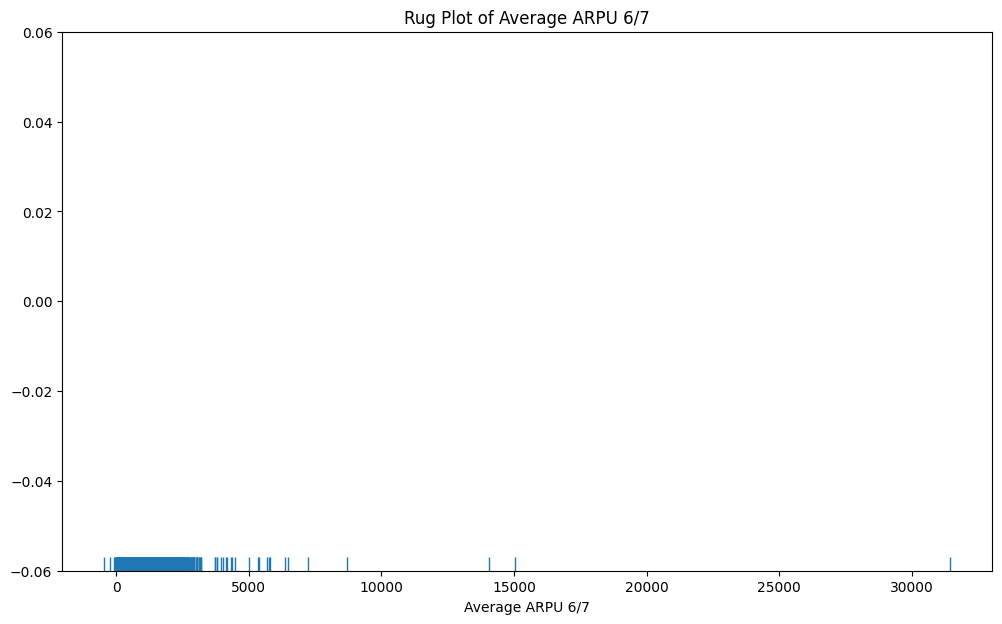

In [97]:
plt.figure(figsize=[12,7])
sns.displot(df_filtered['avg_arpu_6_7'], kde=True, bins=30)
plt.xlabel('Average ARPU 6/7')
plt.ylabel('Frequency')
plt.title('Histogram and KDE of Average ARPU 6/7')
plt.show()


plt.figure(figsize=[12,7])
sns.rugplot(df_filtered['avg_arpu_6_7'])
plt.xlabel('Average ARPU 6/7')
plt.title('Rug Plot of Average ARPU 6/7')
plt.show()

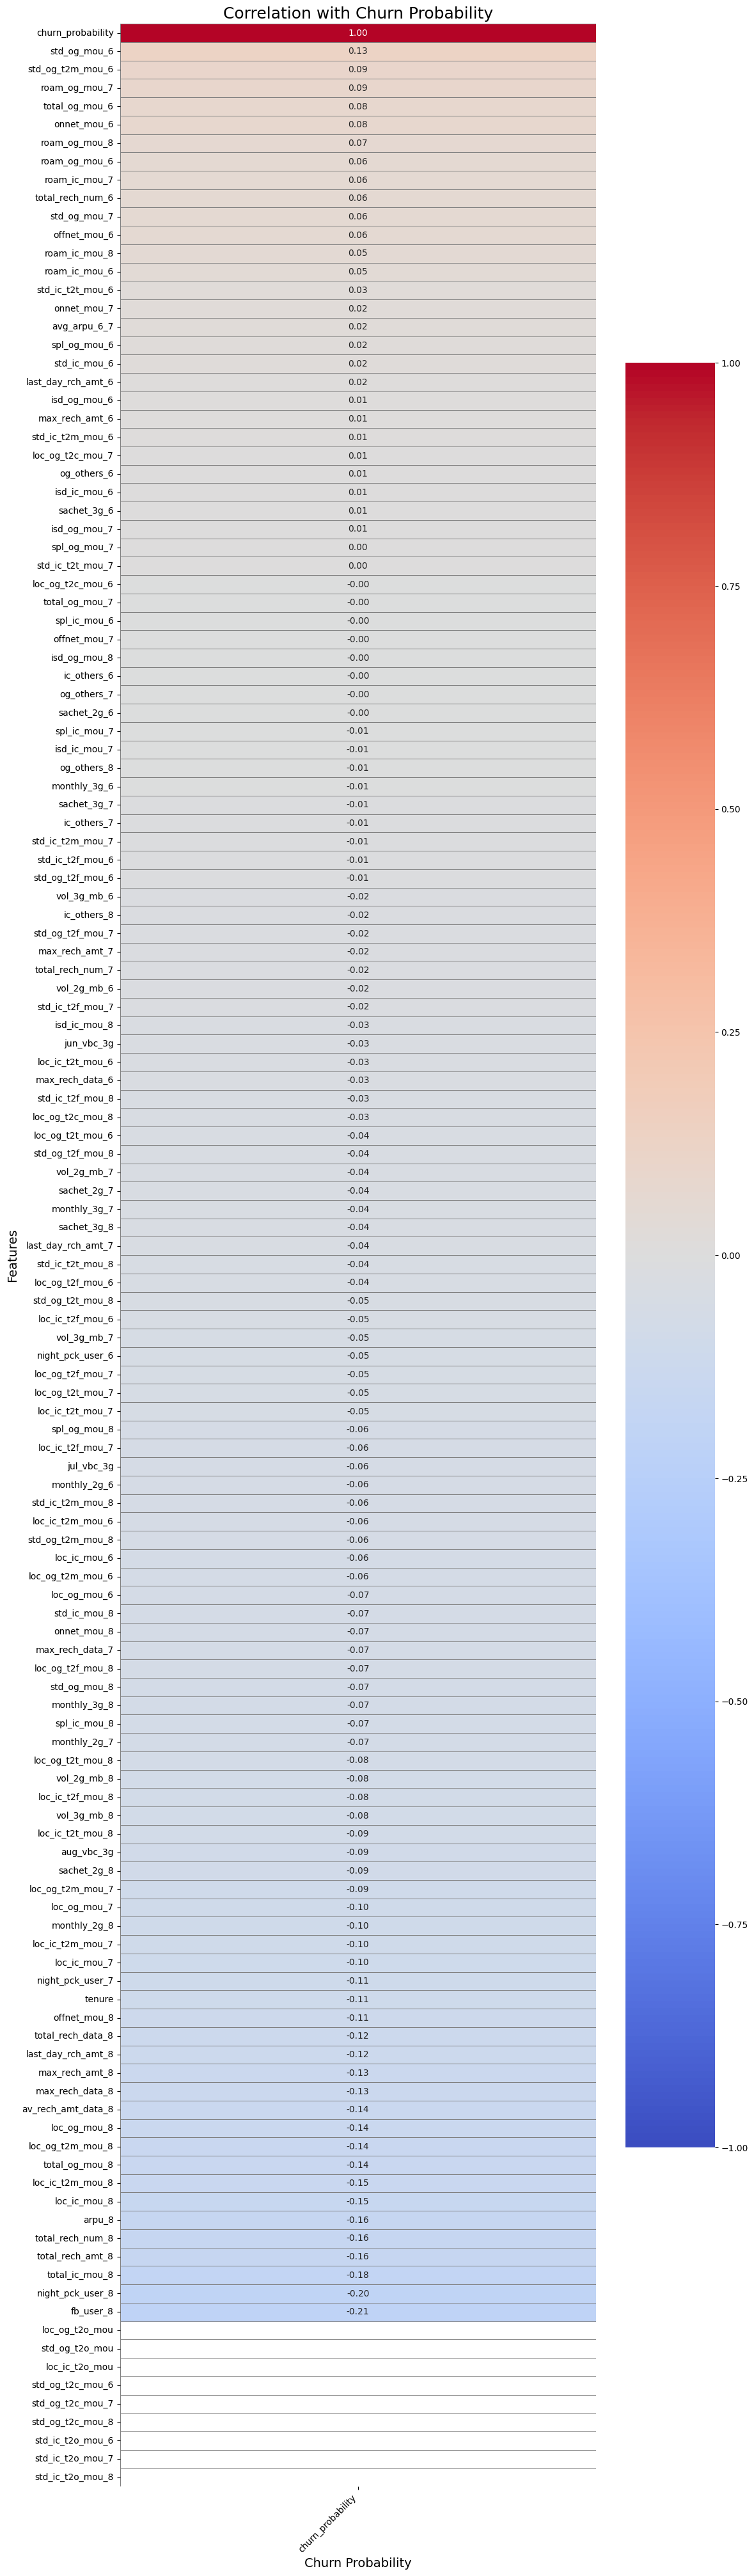

In [101]:
# Filter numeric columns only
numeric_df = df_filtered.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap for features correlating with 'churn_probability'
plt.figure(figsize=(12, 50))
heatmap_churn = sns.heatmap(
    correlation_matrix[['churn_probability']].sort_values(by='churn_probability', ascending=False),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    linecolor='gray'
)

# Set titles and labels
heatmap_churn.set_title("Correlation with Churn Probability", fontsize=18)
heatmap_churn.set_xlabel('Churn Probability', fontsize=14)
heatmap_churn.set_ylabel('Features', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

There is a positive correlation between the average number of outgoing calls and calls on roaming for the 6th and 7th months with churn. Conversely, the average revenue and number of recharges for the 8th month show a negative correlation with churn.

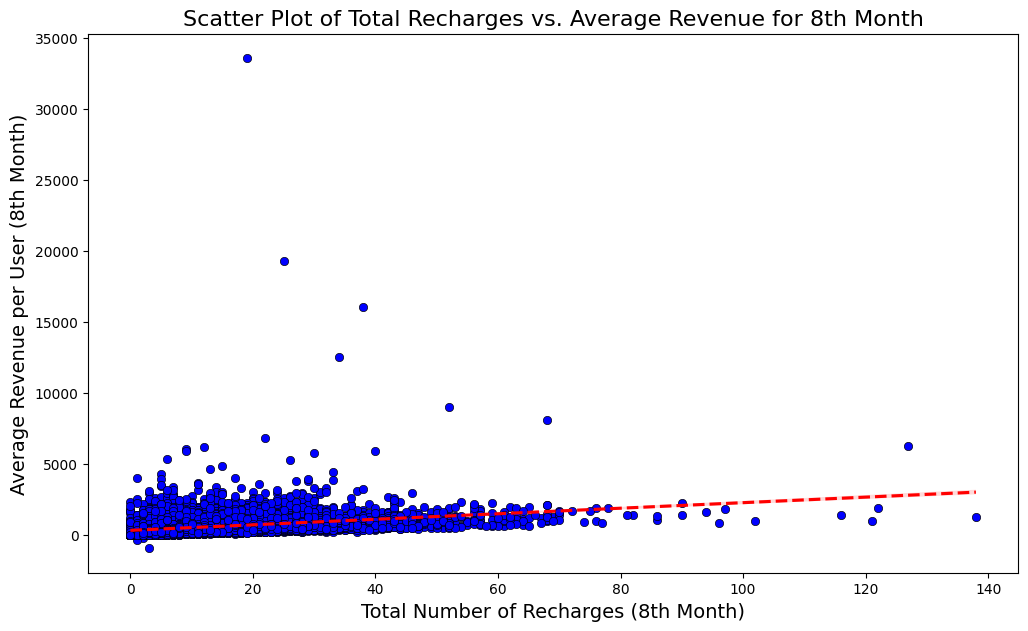

In [102]:
# Create the scatter plot with a regression line
plt.figure(figsize=(12, 7))
sns.scatterplot(x='total_rech_num_8', y='arpu_8', data=df_filtered, color='blue', edgecolor='black')

# Add a regression line to the scatter plot
sns.regplot(x='total_rech_num_8', y='arpu_8', data=df_filtered, scatter=False, color='red', line_kws={"linestyle": "--"})

# Set titles and labels
plt.title('Scatter Plot of Total Recharges vs. Average Revenue for 8th Month', fontsize=16)
plt.xlabel('Total Number of Recharges (8th Month)', fontsize=14)
plt.ylabel('Average Revenue per User (8th Month)', fontsize=14)

# Show plot
plt.show()

In [103]:
df_filtered['total_rech_data_group_8']=pd.cut(df_filtered['total_rech_data_8'], [-1,0,10,25,100], labels=["No_Recharge", "<=10_Recharges", "10-25_Recharges", ">25_Recharges"])
df_filtered['total_rech_num_group_8']=pd.cut(df_filtered['total_rech_num_8'], [-1,0,10,25,1000], labels=["No_Recharge", "<=10_Recharges", "10-25_Recharges", ">25_Recharges"])


Distribution of Total Recharge Data Group (8th Month):
 total_rech_data_group_8
<=10_Recharges     10729
No_Recharge         9833
10-25_Recharges      421
>25_Recharges         30
Name: count, dtype: int64

Distribution of Total Recharge Number Group (8th Month):
 total_rech_num_group_8
<=10_Recharges     13533
10-25_Recharges     5829
>25_Recharges       1255
No_Recharge          396
Name: count, dtype: int64


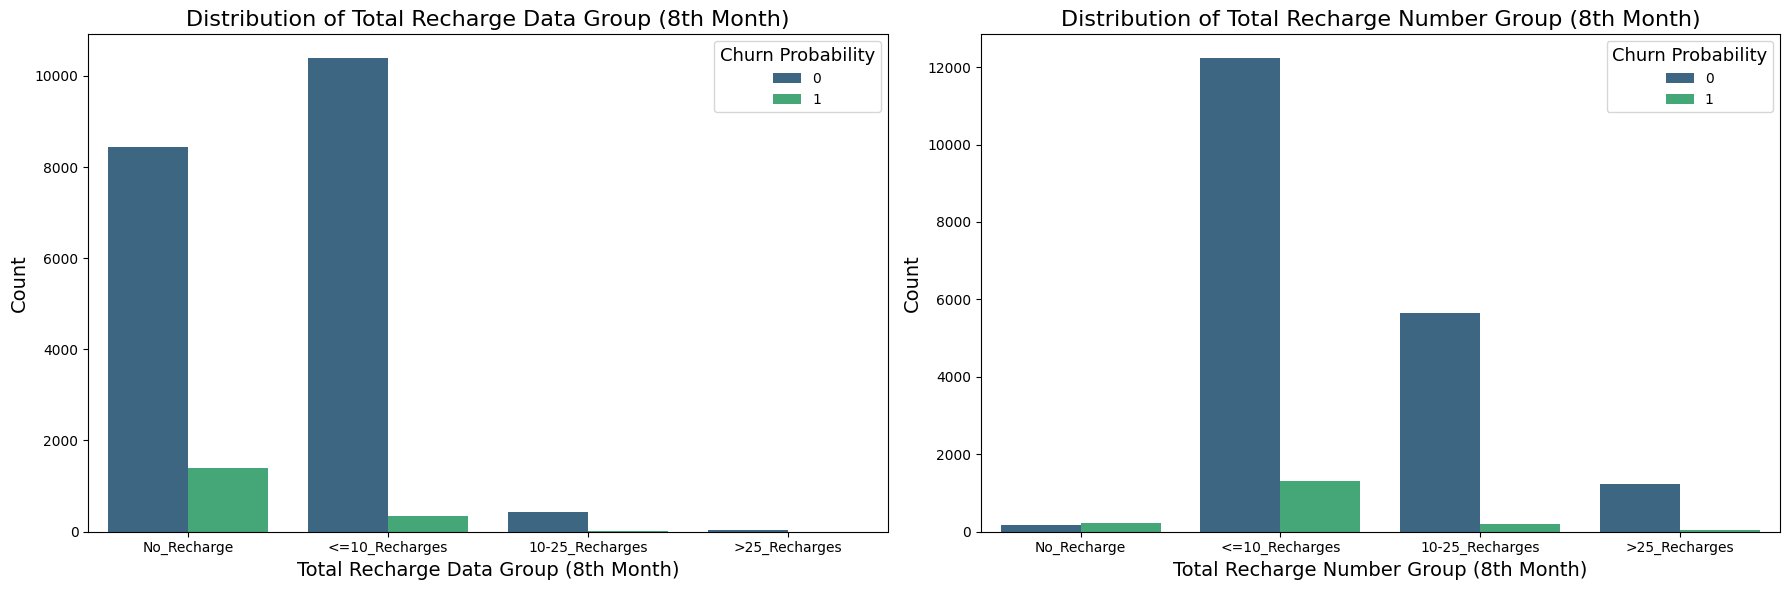

double click to enlarge image.


In [105]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for total_rech_data_group_8
sns.countplot(data=df_filtered, x="total_rech_data_group_8", hue="churn_probability", ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Total Recharge Data Group (8th Month)', fontsize=16)
axes[0].set_xlabel('Total Recharge Data Group (8th Month)', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].legend(title='Churn Probability', title_fontsize='13', loc='upper right')

# Print distribution of total_rech_data_group_8
print("\nDistribution of Total Recharge Data Group (8th Month):\n", df_filtered['total_rech_data_group_8'].value_counts())

# Plot for total_rech_num_group_8
sns.countplot(data=df_filtered, x="total_rech_num_group_8", hue="churn_probability", ax=axes[1], palette='viridis')
axes[1].set_title('Distribution of Total Recharge Number Group (8th Month)', fontsize=16)
axes[1].set_xlabel('Total Recharge Number Group (8th Month)', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].legend(title='Churn Probability', title_fontsize='13', loc='upper right')

# Print distribution of total_rech_num_group_8
print("\nDistribution of Total Recharge Number Group (8th Month):\n", df_filtered['total_rech_num_group_8'].value_counts())

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

print("double click to enlarge image.")

Number of recharge disproportioned to churn

In [106]:
df_filtered.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7',
              'last_day_rch_amt_8',], axis=1, inplace=True)

In [107]:
df_filtered.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
         'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',], axis=1, inplace=True)

In [108]:
df_filtered.shape

(21013, 56)

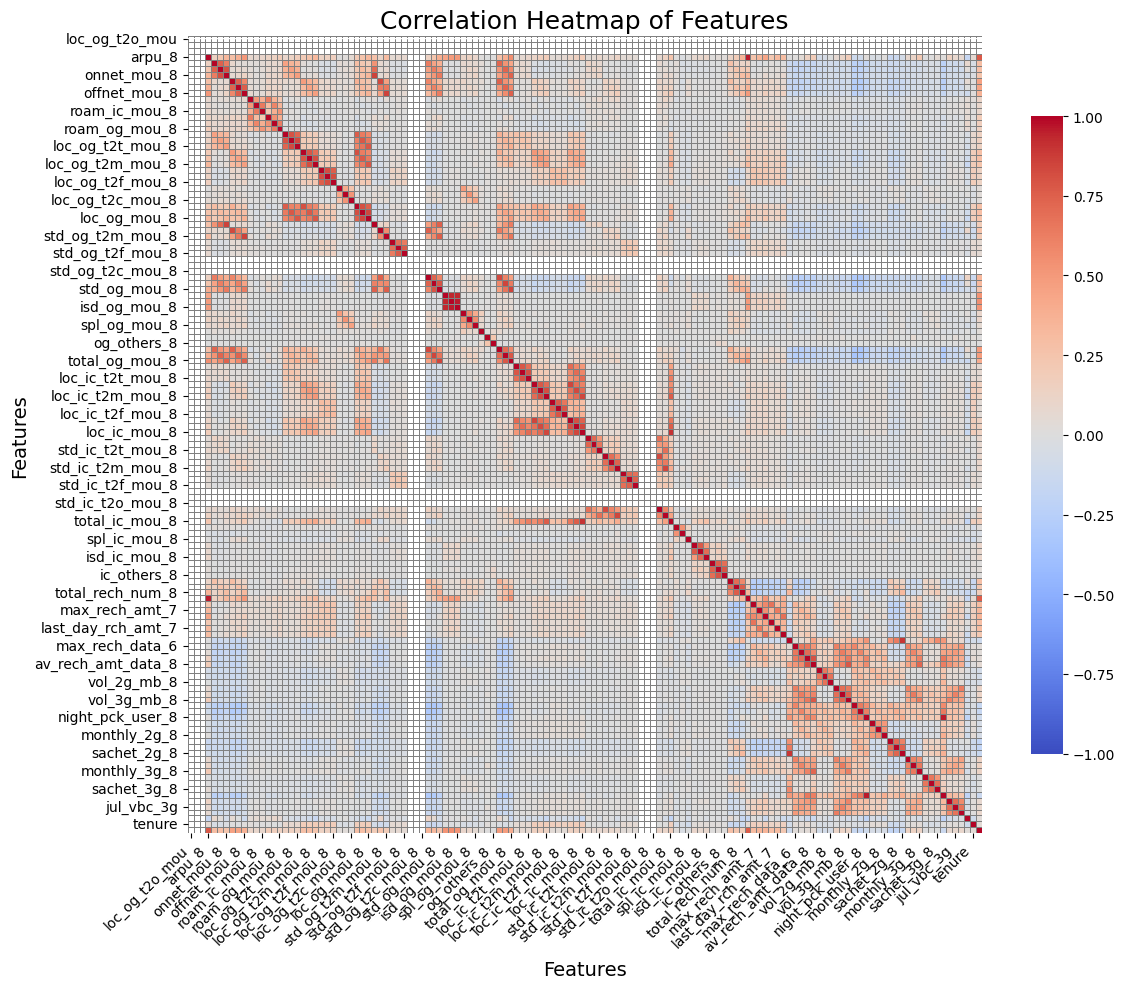

double click to enlarge image.


In [113]:
# Set figure size for better readability
plt.figure(figsize=(12, 10))

# Create the heatmap
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,                
    fmt='.2f',                 
    cmap='coolwarm',           
    vmin=-1, vmax=1,           
    linewidths=0.5,            
    linecolor='gray',          
    cbar_kws={'shrink': 0.8}   
)

# Set titles and labels
plt.title('Correlation Heatmap of Features', fontsize=18)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

print("double click to enlarge image.")

In [114]:
df_filtered.drop(['total_rech_data_group_8','total_rech_num_group_8',] , axis=1, inplace=True)

In [115]:
df_filtered.shape

(21013, 54)

In [116]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   arpu_8             21013 non-null  float64 
 1   onnet_mou_6        21013 non-null  float64 
 2   onnet_mou_7        21013 non-null  float64 
 3   onnet_mou_8        21013 non-null  float64 
 4   offnet_mou_6       21013 non-null  float64 
 5   offnet_mou_7       21013 non-null  float64 
 6   offnet_mou_8       21013 non-null  float64 
 7   std_og_t2t_mou_8   21013 non-null  float64 
 8   std_og_t2m_mou_8   21013 non-null  float64 
 9   isd_og_mou_8       21013 non-null  float64 
 10  og_others_6        21013 non-null  float64 
 11  og_others_7        21013 non-null  float64 
 12  og_others_8        21013 non-null  float64 
 13  total_og_mou_7     21013 non-null  float64 
 14  total_og_mou_8     21013 non-null  float64 
 15  std_ic_mou_8       21013 non-null  float64 
 16  tota

In [117]:
# removing tenure range
df_filtered.drop(['tenure_range'] , axis=1, inplace=True)

#### churn rate

In [118]:
churn_rate = (sum(df_filtered["churn_probability"])/len(df_filtered["churn_probability"].index))*100
churn_rate

8.275829248560415

### Dividing the data into Train and Test

In [120]:
df_filtered.shape

(21013, 53)

In [121]:
X = df_filtered.drop("churn_probability", axis = 1)
y = df_filtered.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [122]:
X_train.shape

(15759, 52)

In [125]:
X_test.shape

(5254, 52)

In [127]:
y_train.shape

(15759,)

In [128]:
y_test.shape

(5254,)

In [129]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
13528,553.107,597.83,448.53,594.29,149.26,175.73,299.99,569.78,194.28,0.00,2.31,0.0,0.0,567.31,811.06,20.54,74.66,0.00,0.00,0.00,10,10,9,677,128,110,150,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,99.0,533.9885
7183,199.111,364.79,617.33,51.71,124.69,258.86,40.08,0.00,0.00,0.00,0.00,0.0,0.0,843.16,0.00,0.00,0.00,0.00,0.00,0.00,19,27,5,180,36,50,50,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,37.0,520.9410
14666,267.706,84.68,117.61,87.43,552.86,510.43,383.46,3.40,30.44,1.55,0.00,0.0,0.0,628.04,470.89,77.16,679.71,3.83,5.28,13.16,2,6,2,200,150,215,200,152.0,152.0,152.0,17.59,25.76,42.74,495.46,397.32,289.58,0.0,0.0,0.0,0,0,0,1,0,0,0,1.0,197.37,288.6,185.75,93.0,397.1430
17922,409.262,636.51,728.43,700.23,177.04,137.53,162.48,694.38,135.54,0.00,0.00,0.0,0.0,865.96,862.88,18.84,25.21,0.00,0.00,0.00,11,10,11,596,110,110,130,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,12.0,444.9220
5165,293.627,739.41,185.51,66.08,481.24,673.68,534.98,53.94,488.14,0.00,0.00,0.0,0.0,861.13,547.49,10.98,24.11,0.00,0.00,0.00,12,13,6,360,110,110,130,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,32.0,470.9800


In [130]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

##### standardisation

In [133]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [135]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
13528,0.043460,0.081043,0.054982,0.059564,0.017849,0.029850,0.021417,0.071094,0.013927,0.000000,0.003788,0.0,0.0,0.068469,0.057755,0.005437,0.015553,0.000000,0.00000,0.000000,0.058824,0.072464,0.065217,0.014938,0.031920,0.033343,0.033715,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.673913,0.030909
7183,0.033196,0.049452,0.075674,0.005183,0.014911,0.043970,0.002861,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.101762,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.111765,0.195652,0.036232,0.003972,0.008978,0.015156,0.011238,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.224638,0.030500
14666,0.035185,0.011479,0.014417,0.008763,0.066113,0.086703,0.027376,0.000424,0.002182,0.000427,0.000000,0.0,0.0,0.075799,0.033532,0.020424,0.141594,0.002849,0.00353,0.010877,0.011765,0.043478,0.014493,0.004413,0.037406,0.065171,0.044954,0.097749,0.097749,0.097749,0.00171,0.003272,0.003844,0.010833,0.014117,0.009641,0.5,0.5,0.5,0.0,0.0,0.0,0.022727,0.0,0.0,0.0,1.0,0.015281,0.031487,0.016635,0.630435,0.026618
17922,0.039289,0.086286,0.089293,0.070182,0.021171,0.023361,0.011600,0.086641,0.009716,0.000000,0.000000,0.0,0.0,0.104513,0.061445,0.004987,0.005252,0.000000,0.00000,0.000000,0.064706,0.072464,0.079710,0.013151,0.027431,0.033343,0.029220,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.043478,0.028116
5165,0.035937,0.100236,0.022740,0.006623,0.057548,0.114432,0.038193,0.006730,0.034992,0.000000,0.000000,0.0,0.0,0.103930,0.038987,0.002906,0.005022,0.000000,0.00000,0.000000,0.070588,0.094203,0.043478,0.007944,0.027431,0.033343,0.029220,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.188406,0.028933


In [136]:
smote = SMOTE(random_state=42)
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (28910, 52)
Dimension of y_train_sm Shape: (28910,)


### Logistic Regression

In [138]:
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                28910
Model:                            GLM   Df Residuals:                    28857
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 10 Sep 2024   Deviance:                       22394.
Time:                        20:27:34   Pearson chi2:                 1.80e+07
No. Iterations:                    40   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2170      0.197      1.104      0.270      -0.168       0.602
arpu_8              -5.5828      6.773     -0.824      0.410     -18.858       7.692
onnet_mou_6         -0.7263      0.484     -1.500      0.134      -1.675       0.223
onnet_mou_7         -7.1595      2.151     -3.328      0.001     -11.375      -2.944
onnet_mou_8         75.8806      3.628     20.917      0.000      68.770      82.991
offnet_mou_6        -0.3989      0.567     -0.703      0.482      -1.511       0.713
offnet_mou_7        -5.2920      1.536     -3.445      0.001      -8.303      -2.281
offnet_mou_8        96.9212      4.667     20.769      0.000      87.775     106.068
std_og_t2t_mou_8     7.7649      1.622      4.788      0.000       4.586      10.944
std_og_t2m_mou_8    19.7109      2.965      6.648      0.000      13.900      25.522
isd_og_mou_8        36.3631      4.428      8.212      0.000      27.684      45.042
og_others_6        -14.6087      6.447     -2.266      0.023     -27.244      -1.973
og_others_7         -3.5242      9.742     -0.362      0.718     -22.619      15.570
og_others_8      -5.252e+05   5.83e+07     -0.009      0.993   -1.15e+08    1.14e+08
total_og_mou_7       8.6655      2.010      4.310      0.000       4.725      12.606
total_og_mou_8    -120.3230      4.488    -26.812      0.000    -129.119    -111.527
std_ic_mou_8         9.4941      1.393      6.816      0.000       6.764      12.224
total_ic_mou_8     -21.3638      0.977    -21.869      0.000     -23.278     -19.449
ic_others_6        -11.8896      5.113     -2.325      0.020     -21.911      -1.868
ic_others_7          8.8567      4.551      1.946      0.052      -0.064      17.777
ic_others_8         -1.1223      5.517     -0.203      0.839     -11.935       9.690
total_rech_num_6     1.4315      0.574      2.496      0.013       0.307       2.556
total_rech_num_7     4.6727      0.579      8.068      0.000       3.538       5.808
total_rech_num_8   -10.9223      0.756    -14.452      0.000     -12.404      -9.441
total_rech_amt_8   -87.6504      8.950     -9.793      0.000    -105.193     -70.108
max_rech_amt_6      -1.3481      0.595     -2.267      0.023      -2.514      -0.183
max_rech_amt_7      -0.4347      0.495     -0.878      0.380      -1.404       0.535
max_rech_amt_8       2.8383      1.059      2.681      0.007       0.764       4.913
max_rech_data_6      0.2782      0.543      0.512      0.609      -0.787       1.343
max_rech_data_7      2.7959      0.584      4.786      0.000       1.651       3.941
max_rech_data_8     -1.0049      0.718     -1.400      0.162      -2.412       0.402
vol_2g_mb_6         -0.6271      0.855     -0.734      0.463      -2.303       1.048
vol_2g_mb_7          3.3258      0.734      4.529      0.000       1.886       4.765
vol_2g_mb_8         -4.

### Logistic Regression RFE

In [139]:
from sklearn.feature_selection import RFE

In [140]:
logreg = LogisticRegression()
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [141]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("Columns after RFE : \n\n", rfe_columns)

Columns after RFE : 

 Index(['arpu_8', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'total_og_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g',
       'avg_arpu_6_7'],
      dtype='object')


### StatsModels

In [144]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                28910
Model:                            GLM   Df Residuals:                    28889
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11906.
Date:                Tue, 10 Sep 2024   Deviance:                       23811.
Time:                        20:29:53   Pearson chi2:                 2.07e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4303
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1961      0.165      1.186      0.236      -0.128       0.520
arpu_8               7.2868      5.629      1.295      0.195      -3.746      18.319
onnet_mou_7          5.4064      0.491     11.007      0.000       4.444       6.369
offnet_mou_6         0.5460      0.535      1.020      0.308      -0.503       1.595
offnet_mou_7         2.6138      0.427      6.118      0.000       1.776       3.451
total_og_mou_8     -15.6507      0.975    -16.045      0.000     -17.563     -13.739
std_ic_mou_8        21.0384      1.257     16.735      0.000      18.574      23.502
total_ic_mou_8     -34.9448      0.843    -41.434      0.000     -36.598     -33.292
total_rech_num_6     2.6801      0.491      5.458      0.000       1.718       3.643
total_rech_num_7     3.3810      0.519      6.508      0.000       2.363       4.399
total_rech_num_8   -11.7347      0.683    -17.179      0.000     -13.073     -10.396
total_rech_amt_8   -38.0185      6.570     -5.787      0.000     -50.895     -25.142
max_rech_amt_6       0.4507      0.529      0.852      0.394      -0.586       1.487
max_rech_amt_8      -1.7750      0.754     -2.355      0.019      -3.252      -0.298
vol_2g_mb_8         -5.1617      1.106     -4.665      0.000      -7.330      -2.993
vol_3g_mb_8         -5.0002      1.297     -3.854      0.000      -7.543      -2.458
monthly_2g_8        -7.4544      0.438    -17.035      0.000      -8.312      -6.597
sachet_2g_8         -5.8319      0.511    -11.416      0.000      -6.833      -4.831
monthly_3g_8        -5.5034      0.894     -6.157      0.000      -7.255      -3.752
aug_vbc_3g          -9.6254      1.116     -8.626      0.000     -11.812      -7.438
avg_arpu_6_7        40.7496      3.383     12.045      0.000      34.119      47.381
====================================================================================
"""

#### Significant Predictors of Higher Churn Probability: 
- On-network MOU (onnet_mou_7)
- off-network MOU (offnet_mou_7)
- total recharge number (total_rech_num_6, total_rech_num_7)
- and average ARPU (avg_arpu_6_7)
#### Significant Predictors of Lower Churn Probability: 
- Total outgoing MOU
- standard incoming MOU
- total incoming MOU
- total recharge number (total_rech_num_8)
- total recharge amount
- max recharge amount
- data usage (both 2G and 3G)

In [146]:
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred

array([0.46213275, 0.92969285, 0.02331119, ..., 0.15538789, 0.87782169,
       0.46547924])

In [147]:
y_train_sm_pred_final = pd.DataFrame({'converted':y_train_sm.values, 'converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,converted,converted_prob
0,0,0.462133
1,1,0.929693
2,0,0.023311
3,0,0.521673
4,0,0.735334


In [149]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_sm_pred_final.head()

,converted,converted_prob,churn_pred
0,0,0.462133,0
1,1,0.929693,1
2,0,0.023311,0
3,0,0.521673,1
4,0,0.735334,1


### Generate the confusion matrix

Confusion Matrix:
[[11630  2825]
 [ 2238 12217]]


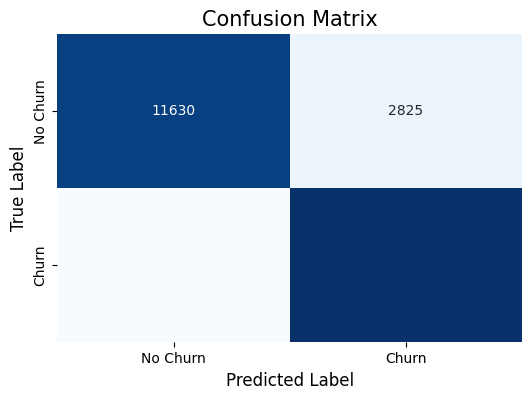

In [151]:
confusion = metrics.confusion_matrix(y_train_sm_pred_final['converted'], y_train_sm_pred_final['churn_pred'])

# Print confusion matrix with labels
print("Confusion Matrix:")
print(confusion)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])

# Add labels and title
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)

# Show the plot
plt.show()

#### accuracy

In [155]:
metrics.accuracy_score(y_train_sm_pred_final.converted, y_train_sm_pred_final.churn_pred)

0.82487028709789

### VIF

In [158]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,avg_arpu_6_7,26.75
0,arpu_8,24.73
8,total_rech_num_7,8.53
9,total_rech_num_8,6.71
7,total_rech_num_6,5.97
10,total_rech_amt_8,5.66
3,offnet_mou_7,5.29
4,total_og_mou_8,5.10
2,offnet_mou_6,4.70
12,max_rech_amt_8,3.46


In [159]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Sensitivity = ", TP / float(TP+FN))
print("Specificity = ", TN / float(TN+FP))
print("False Positive Rate = ", FP/ float(TN+FP))
print ("Precision = ", TP / float(TP+FP))
print ("True Negative Prediction Rate = ", TN / float(TN+ FN))

Sensitivity =  0.8451746800415081
Specificity =  0.8045658941542719
False Positive Rate =  0.19543410584572812
Precision =  0.8121925275894163
True Negative Prediction Rate =  0.8386212864147679


### ROC curve

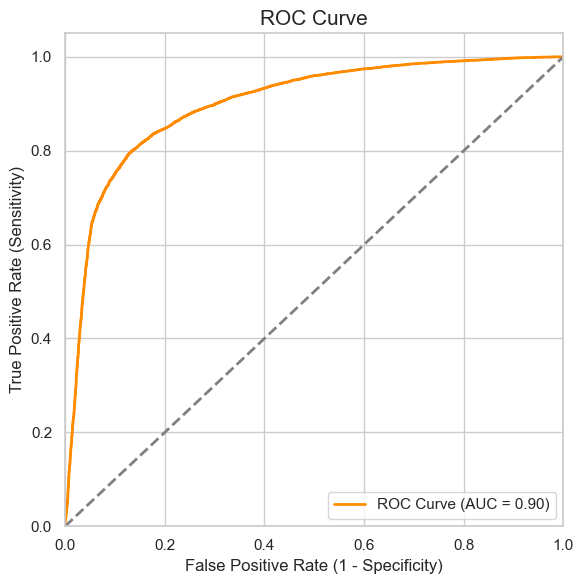

AUC Score: 0.90


In [162]:
# Define a function to plot the ROC curve
def draw_roc(actual, probs):
    # Compute false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)

    # Set plot style and figure size
    plt.figure(figsize=(6, 6))
    sns.set(style='whitegrid')

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)  # Diagonal baseline

    # Set plot limits
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    # Add labels, title, and legend
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
    plt.title('ROC Curve', fontsize=15)
    plt.legend(loc="lower right")

    # Display the plot
    plt.tight_layout()
    plt.show()

    return auc_score  # Optionally return AUC score

# Plot the ROC curve using the defined function
auc_score = draw_roc(y_train_sm_pred_final['converted'], y_train_sm_pred_final['converted_prob'])

# Print the AUC score
print(f"AUC Score: {auc_score:.2f}")

#### cutoff point

In [166]:
# Define thresholds (from 0.0 to 0.9, step 0.1)
thresholds = [x / 10 for x in range(10)]

# Create new columns for each threshold using vectorized operations
for threshold in thresholds:
    y_train_sm_pred_final[f'{threshold:.1f}'] = (y_train_sm_pred_final['converted_prob'] > threshold).astype(int)

# Display the first few rows of the updated DataFrame
y_train_sm_pred_final.head()

,converted,converted_prob,churn_pred,thresh_0.0,thresh_0.1,thresh_0.2,thresh_0.3,thresh_0.4,thresh_0.5,thresh_0.6,thresh_0.7,thresh_0.8,thresh_0.9,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.462133,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0
1,1,0.929693,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023311,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0.521673,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0
4,0,0.735334,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0


In [171]:
y_train_sm_pred_final = y_train_sm_pred_final.loc[:, ~y_train_sm_pred_final.columns.str.startswith('thresh_')]
y_train_sm_pred_final.head()

,converted,converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.462133,0,1,1,1,1,1,0,0,0,0,0
1,1,0.929693,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023311,0,1,0,0,0,0,0,0,0,0,0
3,0,0.521673,1,1,1,1,1,1,1,0,0,0,0
4,0,0.735334,1,1,1,1,1,1,1,1,1,0,0


In [174]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Initialize an empty list to store the results
cutoff_results = []

# Define the range of probability thresholds
thresholds = [x / 10 for x in range(10)]

# Loop through each threshold and calculate confusion matrix, accuracy, sensitivity, and specificity
for threshold in thresholds:
    # Ensure the threshold is treated as a string to match column names
    threshold_str = f"{threshold:.1f}"
    
    # Get confusion matrix for the current threshold
    cm = confusion_matrix(y_train_sm_pred_final['converted'], y_train_sm_pred_final[threshold_str])
    
    # Extract True Positives, True Negatives, False Positives, and False Negatives
    TN, FP, FN, TP = cm.ravel()

    # Calculate accuracy, sensitivity (recall), and specificity
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)  # True positive rate
    specificity = TN / (TN + FP)  # True negative rate

    # Append the results to the list as a dictionary
    cutoff_results.append({
        'probability': threshold,
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity
    })

# Convert the list of results into a DataFrame
cutoff_df = pd.DataFrame(cutoff_results)

# Display the results
print(cutoff_df)


   probability  accuracy  sensitivity  specificity
0          0.0  0.500000     1.000000     0.000000
1          0.1  0.683293     0.974957     0.391629
2          0.2  0.743065     0.951228     0.534901
3          0.3  0.782255     0.919958     0.644552
4          0.4  0.810377     0.885368     0.735386
5          0.5  0.824870     0.845175     0.804566
6          0.6  0.832722     0.796749     0.868696
7          0.7  0.819613     0.722103     0.917122
8          0.8  0.766482     0.577793     0.955171
9          0.9  0.608717     0.234521     0.982912


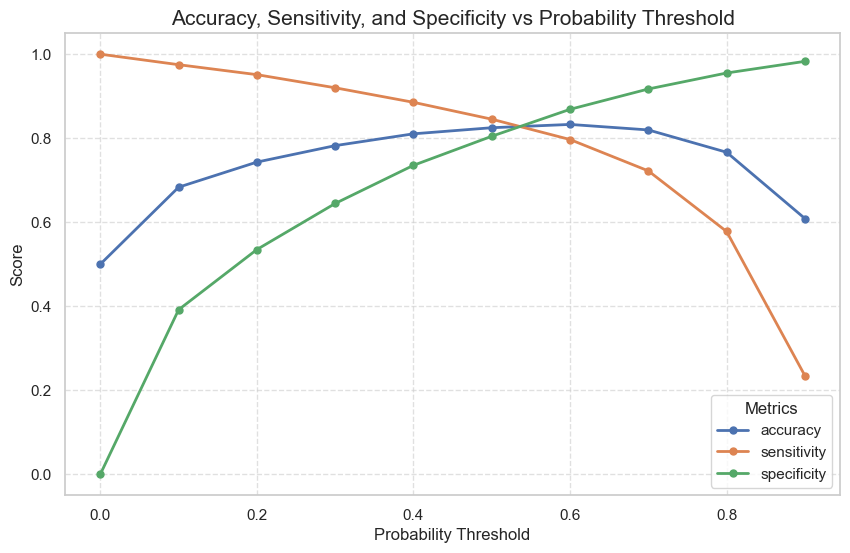

In [176]:
# Plot the accuracy, sensitivity, and specificity over probability thresholds
plt.figure(figsize=(10, 6))

# Plot lines with distinct styles and colors
cutoff_df.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'], 
                    linestyle='-', marker='o', markersize=5, linewidth=2, ax=plt.gca())

# Add titles and labels
plt.title('Accuracy, Sensitivity, and Specificity vs Probability Threshold', fontsize=15)
plt.xlabel('Probability Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Customize the legend
plt.legend(title='Metrics', loc='best')

# Show the plot
plt.show()


Initially, we selected a cutoff value of 0.5 for classification. However, based on the analysis of the graph, it appears that the optimal cutoff value is slightly higher than 0.5 but still below 0.6. To further refine our model, we should adjust the cutoff value within this range to identify the most effective threshold for our specific requirements.



In [179]:
cutoff_values = [0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59]

# Iterate through each cutoff value and create a new column for each
for cutoff in cutoff_values:
    # Use a lambda function to classify based on the cutoff value
    y_train_sm_pred_final[f'{cutoff}'] = y_train_sm_pred_final['converted_prob'].apply(lambda x: 1 if x > cutoff else 0)

# Display the first few rows to check the new columns
y_train_sm_pred_final.head()

,converted,converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,cutoff_0.5,cutoff_0.51,cutoff_0.52,cutoff_0.53,cutoff_0.54,cutoff_0.55,cutoff_0.56,cutoff_0.57,cutoff_0.58,cutoff_0.59,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.462133,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.929693,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023311,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.521673,1,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0.735334,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [182]:
import pandas as pd
from sklearn import metrics

# Initialize an empty list to store results
results = []

# Define the range of cutoff values
cutoff_values = [0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59]

# Iterate through each cutoff value
for cutoff in cutoff_values:
    # Generate predictions based on the current cutoff value
    y_pred = y_train_sm_pred_final['converted_prob'].apply(lambda x: 1 if x > cutoff else 0)
    
    # Calculate confusion matrix
    cm = metrics.confusion_matrix(y_train_sm_pred_final['converted'], y_pred)
    
    # Extract TP, TN, FP, FN
    TN, FP, FN, TP = cm.ravel()
    
    # Calculate accuracy, sensitivity, and specificity
    total = cm.sum()
    accuracy = (TP + TN) / total
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    # Store the results in a dictionary
    results.append({
        'probability': cutoff,
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity
    })

# Convert the list of results to a DataFrame
cutoff_df = pd.DataFrame(results)

# Display the results
print(cutoff_df)


   probability  accuracy  sensitivity  specificity
0         0.50  0.824870     0.845175     0.804566
1         0.51  0.826773     0.842062     0.811484
2         0.52  0.828571     0.838395     0.818748
3         0.53  0.829298     0.833068     0.825527
4         0.54  0.829505     0.827534     0.831477
5         0.55  0.830439     0.822899     0.837980
6         0.56  0.831235     0.818402     0.844068
7         0.57  0.831581     0.813767     0.849395
8         0.58  0.831615     0.807887     0.855344
9         0.59  0.832065     0.802629     0.861501


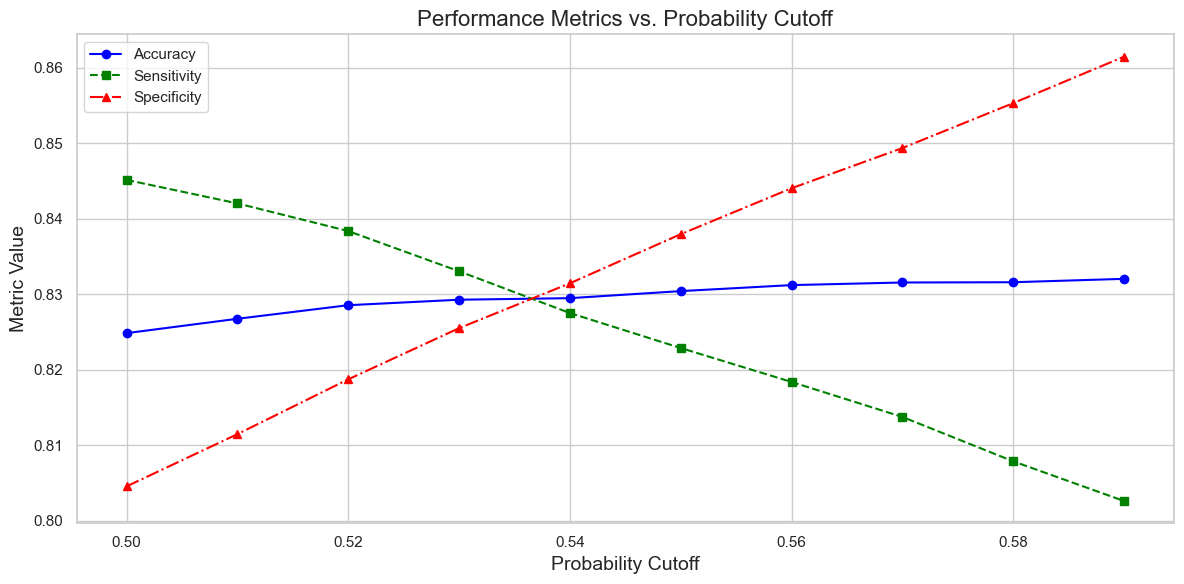

In [183]:

# Plot the results with enhancements
plt.figure(figsize=(12, 6))

# Plot each metric with different styles
plt.plot(cutoff_df['probability'], cutoff_df['accuracy'], marker='o', linestyle='-', color='blue', label='Accuracy')
plt.plot(cutoff_df['probability'], cutoff_df['sensitivity'], marker='s', linestyle='--', color='green', label='Sensitivity')
plt.plot(cutoff_df['probability'], cutoff_df['specificity'], marker='^', linestyle='-.', color='red', label='Specificity')

# Add titles and labels
plt.title('Performance Metrics vs. Probability Cutoff', fontsize=16)
plt.xlabel('Probability Cutoff', fontsize=14)
plt.ylabel('Metric Value', fontsize=14)

# Add a legend
plt.legend()

# Add grid lines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

From the graph, we can conclude that the optimal probability cutoff for defining the predicted churn variable is approximately 0.54. This point provides a balanced trade-off between accuracy, sensitivity, and specificity, making it the most suitable threshold for classification in our model.

In [184]:
y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.converted_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

,converted,converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,cutoff_0.5,cutoff_0.51,cutoff_0.52,cutoff_0.53,cutoff_0.54,cutoff_0.55,cutoff_0.56,cutoff_0.57,cutoff_0.58,cutoff_0.59,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.462133,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.929693,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023311,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.521673,1,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,0,0.735334,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [185]:
y_train_sm_pred_final = y_train_sm_pred_final.loc[:, ~y_train_sm_pred_final.columns.str.startswith('cutoff_')]
y_train_sm_pred_final.head()

,converted,converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.462133,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.929693,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023311,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.521673,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,0,0.735334,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1


In [190]:
print('new accuracy : ',
metrics.accuracy_score(y_train_sm_pred_final.converted, y_train_sm_pred_final.final_churn_pred))

new accuracy :  0.8292978208232445


In [193]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.converted, y_train_sm_pred_final.final_churn_pred )

print("new confusion : \n", confusion2)

new confusion : 
 [[11933  2522]
 [ 2413 12042]]


In [194]:
# Extract values from the confusion matrix
TP2 = confusion2[1, 1]  # True Positives
TN2 = confusion2[0, 0]  # True Negatives
FP2 = confusion2[0, 1]  # False Positives
FN2 = confusion2[1, 0]  # False Negatives

# Calculate and print Sensitivity (True Positive Rate)
sensitivity = TP2 / float(TP2 + FN2)
print(f"Sensitivity (True Positive Rate) = {sensitivity:.2f}")

# Calculate and print Specificity (True Negative Rate)
specificity = TN2 / float(TN2 + FP2)
print(f"Specificity (True Negative Rate) = {specificity:.2f}")

# Calculate and print False Positive Rate
fp_rate = FP2 / float(TN2 + FP2)
print(f"False Positive Rate = {fp_rate:.2f}")

# Calculate and print Precision (Positive Predictive Value)
precision = TP2 / float(TP2 + FP2)
print(f"Precision (Positive Predictive Value) = {precision:.2f}")

# Calculate and print Negative Predictive Value
npv = TN2 / float(TN2 + FN2)
print(f"Negative Predictive Value = {npv:.2f}")


Sensitivity (True Positive Rate) = 0.83
Specificity (True Negative Rate) = 0.83
False Positive Rate = 0.17
Precision (Positive Predictive Value) = 0.83
Negative Predictive Value = 0.83


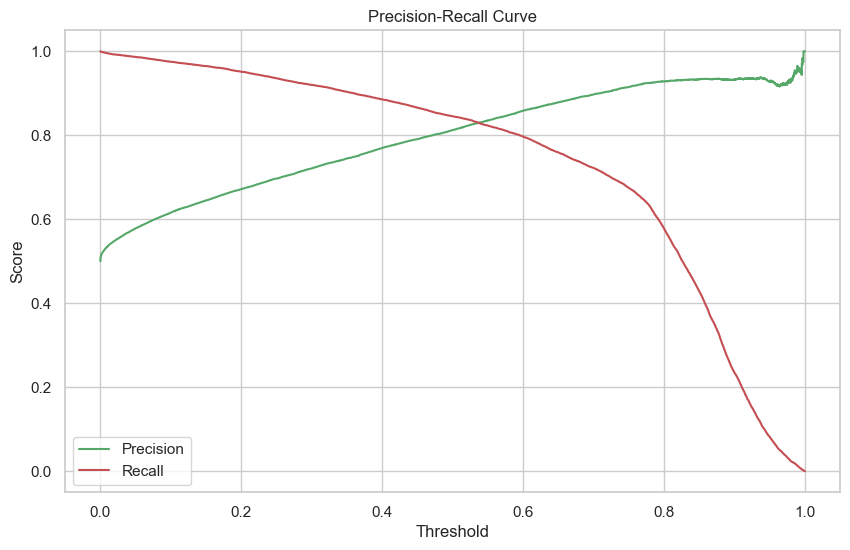

In [196]:
# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(
    y_train_sm_pred_final.converted, 
    y_train_sm_pred_final.converted_prob
)

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='g')
plt.plot(thresholds, recall[:-1], label='Recall', color='r')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Test set

In [199]:
# scalling
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
15213,0.027423,0.010572,0.001738,0.000000,0.230827,0.038560,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.026877,0.00000,0.000000,0.000000,0.000357,0.000000,0.000000,0.141176,0.036232,0.021739,0.000000,0.027431,0.033343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.072464,0.031985
4229,0.034596,0.044357,0.003550,0.005270,0.013873,0.019583,0.004036,0.000000,0.000002,0.0,0.000000,0.0,0.0,0.017722,0.00661,0.000731,0.023340,0.000342,0.000455,0.001372,0.052941,0.043478,0.021739,0.004303,0.029925,0.046681,0.039335,0.099035,0.099035,0.112540,0.000261,0.000070,0.002909,0.021951,0.027973,0.016452,0.5,0.5,0.5,0.25,0.2,0.4,0.000000,0.0,0.0,0.0,1.0,0.007328,0.020946,0.016365,0.014493,0.025160
12573,0.029726,0.029326,0.009352,0.000068,0.136577,0.213513,0.009037,0.000085,0.009004,0.0,0.005707,0.0,0.0,0.161518,0.00920,0.000365,0.000585,0.000000,0.000000,0.000000,0.052941,0.079710,0.021739,0.000662,0.027431,0.033343,0.006743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.033341
19178,0.052097,0.078142,0.049328,0.041272,0.059096,0.048713,0.061279,0.049712,0.040981,0.0,0.000000,0.0,0.0,0.083179,0.09174,0.000524,0.036805,0.000342,0.000000,0.000000,0.182353,0.289855,0.239130,0.021536,0.022444,0.009094,0.022477,0.000000,0.016077,0.010932,0.000000,0.051287,0.008589,0.000000,0.000000,0.000000,0.0,0.5,0.5,0.00,0.0,0.0,0.045455,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.007246,0.036936
15524,0.027423,0.107705,0.037836,0.000000,0.098439,0.067828,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.080973,0.00000,0.000000,0.000000,0.005476,0.000000,0.000000,0.111765,0.079710,0.043478,0.000000,0.027431,0.033343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.072464,0.032732


In [200]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

,arpu_8,onnet_mou_7,offnet_mou_6,offnet_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,aug_vbc_3g,avg_arpu_6_7
15213,0.027423,0.001738,0.230827,0.038560,0.00000,0.000000,0.000000,0.141176,0.036232,0.021739,0.000000,0.027431,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.031985
4229,0.034596,0.003550,0.013873,0.019583,0.00661,0.000731,0.023340,0.052941,0.043478,0.021739,0.004303,0.029925,0.039335,0.002909,0.016452,0.4,0.000000,0.0,0.007328,0.025160
12573,0.029726,0.009352,0.136577,0.213513,0.00920,0.000365,0.000585,0.052941,0.079710,0.021739,0.000662,0.027431,0.006743,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.033341
19178,0.052097,0.049328,0.059096,0.048713,0.09174,0.000524,0.036805,0.182353,0.289855,0.239130,0.021536,0.022444,0.022477,0.008589,0.000000,0.0,0.045455,0.0,0.000000,0.036936
15524,0.027423,0.037836,0.098439,0.067828,0.00000,0.000000,0.000000,0.111765,0.079710,0.043478,0.000000,0.027431,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.032732


In [201]:
# Constant
X_test_SM = sm.add_constant(X_test)

### pred target variable

In [202]:
y_test_pred = res.predict(X_test_SM)
y_test_pred

15213    8.996734e-01
4229     6.368413e-02
12573    9.190317e-01
19178    6.302243e-02
15524    9.034804e-01
17429    8.203925e-01
9740     2.762789e-01
12546    2.771600e-03
20591    1.782706e-01
13319    1.819187e-01
64       3.771153e-01
19717    6.433804e-01
2680     1.128175e-02
6306     1.480478e-01
18109    8.479310e-02
16553    2.131216e-02
1433     7.078985e-02
9081     7.005277e-01
17899    9.381634e-03
4034     1.963004e-01
18859    1.786017e-01
12605    1.421140e-03
4431     1.635367e-01
16560    2.322166e-02
9256     8.189779e-01
8734     5.902371e-01
11471    5.689117e-02
17506    8.559120e-03
1692     2.133628e-01
10400    2.062883e-02
9053     1.087462e-01
16844    5.823063e-01
11913    4.981951e-01
18061    3.863783e-02
3782     6.544484e-01
17434    1.245359e-01
3341     9.074483e-02
6122     5.703425e-01
18225    3.140588e-03
8501     3.470722e-02
4099     4.383090e-01
17091    1.230189e-02
16982    5.175482e-03
19351    8.144676e-02
1970     1.897292e-01
17517    1

In [205]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
15213,0.899673
4229,0.063684
12573,0.919032
19178,0.063022
15524,0.903480


In [206]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
15213,1
4229,0
12573,0
19178,0
15524,1


In [207]:
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)
y_pred_final.head()

,churn_probability,Conv_prob
15213,1,0.899673
4229,0,0.063684
12573,0,0.919032
19178,0,0.063022
15524,1,0.903480


In [208]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn_probability,Conv_prob,test_churn_pred
15213,1,0.899673,1
4229,0,0.063684,0
12573,0,0.919032,1
19178,0,0.063022,0
15524,1,0.903480,1


In [209]:
print('new Accuracy ', metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred))

new Accuracy  0.828511610201751


#### Evaluation

In [210]:
confusion2_test = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.test_churn_pred)
print("test confusion matrix : \n", confusion2_test)

test confusion matrix : 
 [[4004  815]
 [  86  349]]


In [212]:
# Extract confusion matrix values
TP2_test = confusion2_test[1, 1]  # True Positives
TN2_test = confusion2_test[0, 0]  # True Negatives
FP2_test = confusion2_test[0, 1]  # False Positives
FN2_test = confusion2_test[1, 0]  # False Negatives

# Calculate metrics
sensitivity = TP2_test / float(TP2_test + FN2_test)
specificity = TN2_test / float(TN2_test + FP2_test)
false_positive_rate = FP2_test / float(TN2_test + FP2_test)
precision = TP2_test / float(TP2_test + FP2_test)
negative_predictive_value = TN2_test / float(TN2_test + FN2_test)

# Print metrics with improved formatting
print(f"Sensitivity (True Positive Rate) = {sensitivity:.2f}")
print(f"Specificity (True Negative Rate) = {specificity:.2f}")
print(f"False Positive Rate = {false_positive_rate:.2f}")
print(f"Precision (Positive Predictive Value) = {precision:.2f}")
print(f"Negative Predictive Value (True Negative Prediction Rate) = {negative_predictive_value:.2f}")


Sensitivity (True Positive Rate) = 0.80
Specificity (True Negative Rate) = 0.83
False Positive Rate = 0.17
Precision (Positive Predictive Value) = 0.30
Negative Predictive Value (True Negative Prediction Rate) = 0.98


In [213]:
# Calculate metrics
accuracy = metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred) * 100
sensitivity = TP2_test / float(TP2_test + FN2_test) * 100

# Print metrics with improved formatting
print(f"The accuracy of the model is: {accuracy:.2f}%")
print(f"The sensitivity of the model is: {sensitivity:.2f}%")

print("\nNote: This model prioritizes sensitivity, meaning it places greater importance on the true positive rate (i.e., correctly identifying churned customers).")


The accuracy of the model is: 82.85%
The sensitivity of the model is: 80.23%

Note: This model prioritizes sensitivity, meaning it places greater importance on the true positive rate (i.e., correctly identifying churned customers).


#### ROC for test

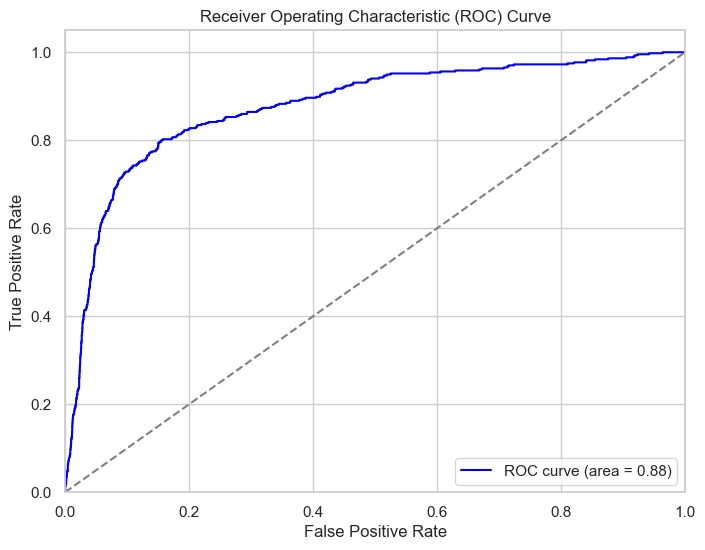

In [217]:
def draw_roc_curve(actual, probs):
    # Compute ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'k--', color='gray')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Compute ROC curve for the test dataset
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn_probability, y_pred_final.Conv_prob, drop_intermediate=False)

# Plot ROC curve
draw_roc_curve(y_pred_final.churn_probability, y_pred_final.Conv_prob)

The AUC (Area Under the Curve) score for the training dataset is 0.90, while for the test dataset, it is 0.88. These values indicate that the model has strong discriminatory power, with the AUC scores close to 1.

An AUC score of 0.90 for the training set suggests that the model performs exceptionally well on the data it was trained on. An AUC score of 0.88 on the test set indicates that the model maintains good performance on unseen data.

Overall, these scores suggest that the model is robust and has good predictive capability, making it a reliable model for the given task.

## PCA

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

In [220]:
X_train.shape

(16810, 52)

In [221]:
pca = PCA(random_state=42)


In [223]:
pca.fit(X_train)


PCA(random_state=42)

In [224]:
pca.explained_variance_ratio_


array([3.30757137e-01, 2.49757152e-01, 8.57094342e-02, 6.38745202e-02,
       4.43347508e-02, 3.43096102e-02, 3.36099665e-02, 3.05610553e-02,
       2.77727739e-02, 1.67762370e-02, 1.36537701e-02, 1.30483677e-02,
       7.50058659e-03, 6.74043417e-03, 6.28704581e-03, 5.68578769e-03,
       4.89873530e-03, 4.80169987e-03, 4.13830502e-03, 3.68999461e-03,
       2.31278963e-03, 2.23161812e-03, 1.89021336e-03, 1.48362031e-03,
       1.39183073e-03, 7.91994641e-04, 7.36442586e-04, 4.13517861e-04,
       3.46617688e-04, 1.68197691e-04, 1.23655371e-04, 8.38021042e-05,
       7.59094956e-05, 1.70732341e-05, 7.58275541e-06, 6.42388188e-06,
       3.60772927e-06, 3.11660159e-06, 1.79652537e-06, 1.54214163e-06,
       6.49773995e-07, 3.99551309e-07, 7.44145110e-08, 6.30229861e-08,
       2.30964343e-08, 1.78796157e-08, 1.60708675e-08, 1.42497337e-08,
       8.65279282e-09, 7.59070205e-09, 6.80550174e-09, 2.22153607e-09])

In [225]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)


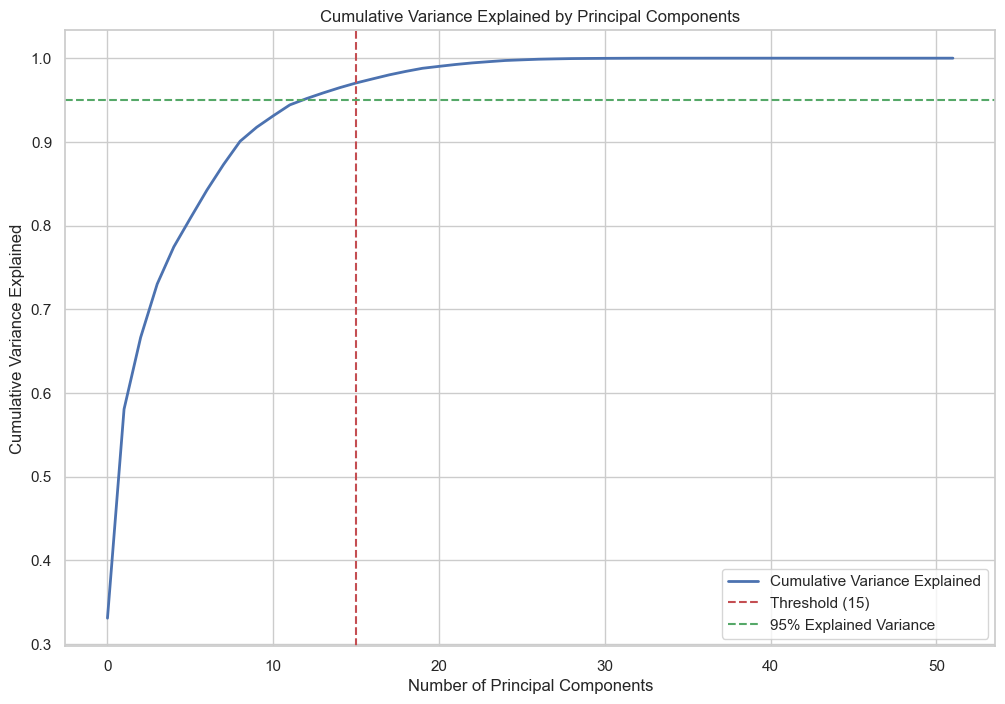

In [226]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[12, 8])

# Plotting the cumulative variance explained
plt.plot(var_cumu, label='Cumulative Variance Explained', color='b', linewidth=2)

# Adding vertical and horizontal lines for reference
plt.axvline(x=15, color='r', linestyle='--', label='Threshold (15)')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Explained Variance')

# Adding labels and title
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.legend(loc='best')

plt.show()


#### Incremental PCA

In [228]:
pca_final = IncrementalPCA(n_components=16)
df_train_pca = pca_final.fit_transform(X_train)

In [229]:

df_train_pca.shape

(16810, 16)

In [230]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(16, 16)

In [231]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape


(4203, 16)

##  Logistic Regression with PCA

In [233]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train)

#### preds

In [236]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [237]:
metrics.roc_auc_score(y_test, pred_probs_test[:,1])

0.8766635335248787

In [238]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [239]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
confusion

array([[3836,   38],
       [ 279,   50]], dtype=int64)

In [240]:
# Extracting confusion matrix elements
TP = confusion[1, 1]  # True Positives
TN = confusion[0, 0]  # True Negatives
FP = confusion[0, 1]  # False Positives
FN = confusion[1, 0]  # False Negatives

# Calculating evaluation metrics
accuracy = metrics.accuracy_score(y_test, pred_probs_test1)
sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)

# Displaying the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")


Accuracy: 0.92
Sensitivity (True Positive Rate): 0.15
Specificity (True Negative Rate): 0.99


#### Preds on Train

In [242]:
pred_probs_train = model_pca.predict_proba(df_train_pca)


In [243]:
metrics.roc_auc_score(y_train, pred_probs_train[:,1])

0.8722774247029568

In [244]:
pred_probs_train1 = model_pca.predict(df_train_pca)


In [245]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, pred_probs_train1)
confusion

array([[15268,   132],
       [ 1193,   217]], dtype=int64)

In [246]:
# Extracting values from the confusion matrix
TP = confusion[1, 1]  # True Positives
TN = confusion[0, 0]  # True Negatives
FP = confusion[0, 1]  # False Positives
FN = confusion[1, 0]  # False Negatives

# Calculating and printing evaluation metrics
accuracy = metrics.accuracy_score(y_train, pred_probs_train1)
sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)

# Displaying results with clear labels
print(f"Accuracy: {accuracy:.2%}")
print(f"Sensitivity (True Positive Rate): {sensitivity:.2%}")
print(f"Specificity (True Negative Rate): {specificity:.2%}")


Accuracy: 92.12%
Sensitivity (True Positive Rate): 15.39%
Specificity (True Negative Rate): 99.14%


## Decision Tree with PCA

In [247]:
from sklearn.tree import DecisionTreeClassifier

In [248]:
dt = DecisionTreeClassifier(random_state=42)


In [249]:
from sklearn.model_selection import GridSearchCV


In [250]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [251]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [252]:
grid_search.fit(df_train_pca, y_train)


Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [253]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.069277,0.003911,0.0,0.0,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
1,0.070336,0.001274,0.0,0.0,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 150}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
2,0.070882,0.001213,0.0,0.0,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
3,0.070188,0.000796,0.0,0.0,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 50}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
4,0.062503,0.000000,0.0,0.0,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 150}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61


In [254]:
score_df.nlargest(5,"mean_test_score")


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
54,0.237477,0.009892,0.001000,0.001000,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
56,0.230721,0.013276,0.000750,0.000829,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
69,0.270460,0.026723,0.000000,0.000000,20,50,50,"{'max_depth': 20, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
71,0.260124,0.016617,0.000000,0.000000,20,50,50,"{'max_depth': 20, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
55,0.229449,0.008415,0.007692,0.006786,10,50,150,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}",0.925291,0.923864,0.920990,0.922418,0.923141,0.001604,5


In [255]:
grid_search.best_estimator_


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [256]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)


In [257]:
dt_best.fit(df_train_pca, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [258]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [259]:
def evaluate_model(dt_classifier):
    # Predictions on training and test datasets
    train_preds = dt_classifier.predict(df_train_pca)
    test_preds = dt_classifier.predict(df_test_pca)
    
    # Training metrics
    print("Training Metrics:")
    print(f"Accuracy: {accuracy_score(y_train, train_preds):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_train, train_preds))
    print("Classification Report:")
    print(classification_report(y_train, train_preds))
    print("-" * 50)
    
    # Test metrics
    print("Testing Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, test_preds):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, test_preds))
    print("Classification Report:")
    print(classification_report(y_test, test_preds))

In [260]:
evaluate_model(dt_best)

Training Metrics:
Accuracy: 0.94
Confusion Matrix:
[[15163   237]
 [  830   580]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     15400
           1       0.71      0.41      0.52      1410

    accuracy                           0.94     16810
   macro avg       0.83      0.70      0.74     16810
weighted avg       0.93      0.94      0.93     16810

--------------------------------------------------
Testing Metrics:
Accuracy: 0.93
Confusion Matrix:
[[3791   83]
 [ 226  103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3874
           1       0.55      0.31      0.40       329

    accuracy                           0.93      4203
   macro avg       0.75      0.65      0.68      4203
weighted avg       0.91      0.93      0.92      4203



## Random Forest with PCA

In [261]:
from sklearn.ensemble import RandomForestClassifier

In [262]:
max_features = int(round(np.sqrt(X_train.shape[1])))
max_features

7

In [263]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=7, random_state=100, oob_score=True, verbose=1)


In [264]:
rf.fit(df_train_pca, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished


RandomForestClassifier(max_depth=4, max_features=7, oob_score=True,
                       random_state=100, verbose=1)

In [265]:
# oob score
rf.oob_score_

0.9190362879238548

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


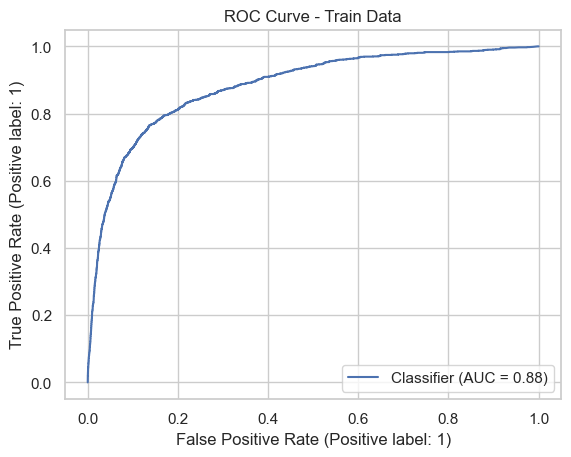

In [269]:
from sklearn.metrics import RocCurveDisplay

y_train_probs = rf.predict_proba(df_train_pca)[:, 1]

# Plotting ROC Curve
RocCurveDisplay.from_predictions(y_train, y_train_probs)
plt.title('ROC Curve - Train Data')
plt.show()

### Hyper paramter tunning with Random Forest

In [270]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)


In [271]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [272]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [273]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [274]:
grid_search.best_score_


0.9187983544085767

In [275]:
grid_search.best_params_


{'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [276]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)


In [277]:
rfc_model.fit(df_train_pca, y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200)

In [278]:
evaluate_model(rfc_model)


Training Metrics:
Accuracy: 0.92
Confusion Matrix:
[[15355    45]
 [ 1290   120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15400
           1       0.73      0.09      0.15      1410

    accuracy                           0.92     16810
   macro avg       0.82      0.54      0.56     16810
weighted avg       0.91      0.92      0.89     16810

--------------------------------------------------
Testing Metrics:
Accuracy: 0.92
Confusion Matrix:
[[3861   13]
 [ 307   22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3874
           1       0.63      0.07      0.12       329

    accuracy                           0.92      4203
   macro avg       0.78      0.53      0.54      4203
weighted avg       0.90      0.92      0.89      4203



In [279]:
rfc_model.feature_importances_


array([0.04816508, 0.16206659, 0.02613717, 0.09045575, 0.02522145,
       0.18229698, 0.06598543, 0.03020143, 0.04689759, 0.23918151,
       0.01228526, 0.03419926, 0.02263925, 0.00470325, 0.003969  ,
       0.00559497])

From Logistic Regression's statsModel's summary

#### Significant Predictors of Higher Churn Probability: 
- On-network MOU (onnet_mou_7)
- off-network MOU (offnet_mou_7)
- total recharge number (total_rech_num_6, total_rech_num_7)
- and average ARPU (avg_arpu_6_7)
#### Significant Predictors of Lower mChurn Probability: 
- Total outgoing MOU
- standard incoming MOU
- total incoming MOU
- total recharge number (total_rech_num_8)
- total recharge amount
- max recharge amount
- data usage (both 2G and 3G)

### Suggestions for Reducing Churn

1. **Promote On-Network and Off-Network Call Incentives:** Offer rewards or discounts to users with high call volumes to increase retention.

2. **Boost Total Call Engagement:** Introduce bundled offers or features that encourage more outgoing and incoming minutes.

3. **Optimize Recharge Offers:** Tailor promotions and bonuses based on recharge behavior to encourage regular recharges and higher spending.

4. **Enhance Data Plans:** Provide attractive data packages and bonuses to increase 2G and 3G data usage, which is linked to lower churn.

5. **Reevaluate Pricing:** Address high average ARPU by offering flexible or tailored pricing options to prevent churn.

6. **Promote Value-Added Services:** Highlight and encourage the use of services like augmented VBC 3G that correlate with lower churn.

7. **Targeted Retention Campaigns:** Use predictive analytics to identify high-risk users and offer personalized retention incentives.

8. **Improve Customer Support:** Invest in better customer service to address issues that could contribute to churn.

9. **Monitor and Adapt:** Continuously track user behavior and adjust strategies to meet changing needs.

10. **Implement a Loyalty Program:** Reward long-term users with perks to incentivize retention.

### Model Performance Summary


After conducting the necessary steps, we have achieved the following results in terms of model accuracy and performance. The models with Principal Component Analysis (PCA) have demonstrated significantly better results, so we are highlighting those below:

### Performance Metrics with PCA:

#### 1. Logistic Regression with PCA:
- Train Accuracy: ~92% 
- Test Accuracy: ~92%

#### 2. Decision Tree with PCA:
- Train Accuracy: ~94%
- Test Accuracy: ~93%

#### 3. Random Forest with PCA:
- Train Accuracy: ~92%
- Test Accuracy: ~92%

Based on these results, the Decision Tree model with PCA stands out as the best performer for predicting customer churn, with the highest accuracy on both the training and test datasets.

 ### submission file generation on test.csv data

In [281]:
df_test = pd.read_csv("test.csv")

In [282]:
df_test.head()


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [284]:
df_test.shape


(30000, 171)

In [285]:
df_test.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                316
std_og_t2o_mou                316
loc_ic_t2o_mou                316
last_date_of_month_6            0
last_date_of_month_7          202
last_date_of_month_8          367
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  1169
onnet_mou_7                  1172
onnet_mou_8                  1675
offnet_mou_6                 1169
offnet_mou_7                 1172
offnet_mou_8                 1675
roam_ic_mou_6                1169
roam_ic_mou_7                1172
roam_ic_mou_8                1675
roam_og_mou_6                1169
roam_og_mou_7                1172
roam_og_mou_8                1675
loc_og_t2t_mou_6             1169
loc_og_t2t_mou_7             1172
loc_og_t2t_mou_8             1675
loc_og_t2m_mou_6             1169
loc_og_t2m_mou_7             1172
loc_og_t2m_mou_8             1675
loc_og_t2f_mou

In [286]:
df_id = df_test['id']

In [287]:
df_test['tenure'] = (df_test['aon']/30).round(0)
df_test["avg_arpu_6_7"] = (df_test['arpu_6'] + df_test['arpu_7'])/2

df_test = df_test[X.columns]

In [288]:
df_test.shape

(30000, 52)

In [289]:
test_null = df_test.isnull().sum().sum() / np.product(df_test.shape) * 100
test_null

11.436923076923076

In [292]:
for col in df_test.columns:
    null_col = df_test[col].isnull().sum() / df_test.shape[0] * 100
    if null_col > 0:
        df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

In [293]:
df_test.isnull().sum().sum()


0

In [294]:
df_test_final = pca_final.transform(df_test)

In [295]:
df_test_final.shape

(30000, 16)

In [299]:
predict_probalbilty_rc = rfc_model.predict(df_test_final)


In [301]:
predict_probalbilty_dt = dt_best.predict(df_test_final)


In [303]:
predict_probalbilty_rc.shape

(30000,)

In [304]:
predict_probalbilty_dt.shape

(30000,)

In [306]:
final_prediction_rc = pd.DataFrame({'id':df_id,'churn_probability':predict_probalbilty_rc})


In [307]:
final_prediction_dt = pd.DataFrame({'id':df_id,'churn_probability':predict_probalbilty_dt})


In [311]:
final_prediction_rc.to_csv('submission_rc.csv',index=False)

In [313]:
final_prediction_dt.to_csv('submission.csv',index=False)